In [251]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

file_path = 'Dataset.xlsx'
df = pd.read_excel(file_path, dtype=str)

In [252]:
df

,NOME RISTORANTE,RAGIONE SOCIALE,PARTITA IVA,FORMA GIURIDICA,CODICE ATECO 2007,DESCRIZIONE ATECO 2007,REGIONE,INIZIO ATTIVITA,CAPITALE SOCIALE,DIPENDENTI\n2022,...,FOLLOWER\nCHEF\n2020,FOLLOWER\nCHEF\n2021,FOLLOWER\nCHEF\n2022,FOLLOWER\nCHEF\n2023,FOLLOWER\nRISTORANTE\n2018,FOLLOWER\nRISTORANTE\n2019,FOLLOWER\nRISTORANTE\n2020,FOLLOWER\nRISTORANTE\n2021,FOLLOWER\nRISTORANTE\n2022,FOLLOWER\nRISTORANTE\n2023
0,CLINICA GASTRONOMICA,DEGOLI ARNALDO & FIGLIE - S.R.L.,00034760355,S.R.L.,551000,ALBERGHI,EMILIA-ROMAGNA,27505,72441,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DOLADA,DOLADA S.R.L.,00040170250,S.R.L.,561011,RISTORAZIONE CON SOMMINISTRAZIONE,VENETO,30120,52000,20,...,25375,39055,37063,36687,NaN,NaN,NaN,NaN,NaN,NaN
2,LOCANDA SAN LORENZO,LOCANDA SAN LORENZO S.R.L.,00091260257,S.R.L.,551000,ALBERGHI,VENETO,27363,50000,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SUINSOM,TYROL S.R.L. UNIPERSONALE,00099450215,S.R.L.,551000,ALBERGHI,TRENTINO,24101,450000,37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LUISL STUBE,BIRRA FORST S.P.A.,00100500214,S.P.A.,110500,PRODUZIONE DI BIRRA,TRENTINO,10136,1100000,350,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,ACQUOLINA,ACQUOLINA 2016 S.R.L.,13917091004,S.R.L.,561011,RISTORAZIONE CON SOMMINISTRAZIONE,LAZIO,42535,30000,35,...,NaN,NaN,NaN,NaN,NaN,NaN,5780,7341,10730,13201
187,GLASS HOSTARIA,ASSOLO FOOD & CATERING S.R.L.,15376681001,S.R.L. semplificata,561011,RISTORAZIONE CON SOMMINISTRAZIONE,LAZIO,23/07/2019,1000,14,...,35190,38282,40741,42230,NaN,NaN,NaN,NaN,NaN,NaN
188,SINTESI,SINTESI - S.R.L.,15548301009,S.R.L.,561011,RISTORAZIONE CON SOMMINISTRAZIONE,LAZIO,43832,10000,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,ORMA ROMA,SALLUSTIANO SRL,16350031007,S.R.L.,561011,RISTORAZIONE CON SOMMINISTRAZIONE,LAZIO,44474,10000,2,...,5742,6184,6345,7159,NaN,NaN,NaN,NaN,NaN,NaN


In [253]:
df.columns

Index(['NOME RISTORANTE', 'RAGIONE SOCIALE', 'PARTITA IVA', 'FORMA GIURIDICA',
       'CODICE ATECO 2007', 'DESCRIZIONE ATECO 2007', 'REGIONE',
       'INIZIO ATTIVITA', 'CAPITALE SOCIALE', 'DIPENDENTI\n2022', 'STELLE',
       'CHEF', 'ALTRO2', 'HOTEL', 'AGRITURIMO', 'AFFITTACAMERE', 'CATERING',
       'ALTRO', 'ALTRO.1', 'UTILE/PERDITA DI ESERCIZIO\nmigl EUR\n2020',
       'UTILE/PERDITA DI ESERCIZIO\nmigl EUR\n2021',
       'UTILE/PERDITA DI ESERCIZIO\nmigl EUR\n2022',
       'TOTALE ATTIVO\nmigl EUR\n2019', 'TOTALE ATTIVO\nmigl EUR\n2020',
       'TOTALE ATTIVO\nmigl EUR\n2021', 'TOTALE ATTIVO\nmigl EUR\n2022',
       'Indice di liquidità\n2020', 'Indice di liquidità\n2021',
       'Indice di liquidità\n2022', 'Indice di indip. finanz. (%)\n2020',
       'Indice di indip. finanz. (%)\n2021',
       'Indice di indip. finanz. (%)\n2022', 'ROA (%)\n2020', 'ROA (%)\n2021',
       'ROA (%)\n2022', 'FOLLOWER\nCHEF\n2018', 'FOLLOWER\nCHEF\n2019',
       'FOLLOWER\nCHEF\n2020', 'FOLLOWER\nC

In [254]:
# Columns we don't need for our statistical analysis
df_cleaned = df.drop(columns=[
    'NOME RISTORANTE', 'RAGIONE SOCIALE', 'PARTITA IVA', 'FORMA GIURIDICA', 'ALTRO.1','ALTRO2','CODICE ATECO 2007','DESCRIZIONE ATECO 2007','CHEF','INIZIO ATTIVITA','UTILE/PERDITA DI ESERCIZIO\nmigl EUR\n2021',
       'UTILE/PERDITA DI ESERCIZIO\nmigl EUR\n2022',
       'TOTALE ATTIVO\nmigl EUR\n2019', 'TOTALE ATTIVO\nmigl EUR\n2020',
       'TOTALE ATTIVO\nmigl EUR\n2021', 'TOTALE ATTIVO\nmigl EUR\n2022','UTILE/PERDITA DI ESERCIZIO\nmigl EUR\n2020'
])


In [255]:
df = df_cleaned
columns_to_convert = ['HOTEL', 'AGRITURIMO', 'AFFITTACAMERE', 'CATERING', 'ALTRO']
# Replace X to 1 to make the variable binary
df[columns_to_convert] = df[columns_to_convert].replace('X', 1)
# Replace missing values to 0
df[columns_to_convert] = df[columns_to_convert].fillna(0).astype(int)
# Create dummies for Regions
df = pd.get_dummies(df, columns=['REGIONE'], drop_first=True)
columns_to_convert = [
    'REGIONE_CALABRIA',
    'REGIONE_CAMPANIA',
    'REGIONE_EMILIA-ROMAGNA',
    'REGIONE_FRIULI-VENEZIA GIULIA',
    'REGIONE_LAZIO',
    'REGIONE_LOMBARDIA',
    'REGIONE_MARCHE',
    'REGIONE_PIEMONTE',
    'REGIONE_PUGLIA',
    'REGIONE_SICILIA',
    'REGIONE_TOSCANA',
    'REGIONE_TRENTINO',
    'REGIONE_UMBRIA',
    'REGIONE_VENETO',
    'REGIONE_SARDEGNA',
    'REGIONE_LIGURIA'

]
# Bolean to integer
df[columns_to_convert] = df[columns_to_convert].astype(int)



C:\Users\emanu\AppData\Local\Temp\ipykernel_20736\3542352242.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns_to_convert] = df[columns_to_convert].replace('X', 1)


In [256]:
df.columns
# having a look to our variables to check everything is all right

Index(['CAPITALE SOCIALE', 'DIPENDENTI\n2022', 'STELLE', 'HOTEL', 'AGRITURIMO',
       'AFFITTACAMERE', 'CATERING', 'ALTRO', 'Indice di liquidità\n2020',
       'Indice di liquidità\n2021', 'Indice di liquidità\n2022',
       'Indice di indip. finanz. (%)\n2020',
       'Indice di indip. finanz. (%)\n2021',
       'Indice di indip. finanz. (%)\n2022', 'ROA (%)\n2020', 'ROA (%)\n2021',
       'ROA (%)\n2022', 'FOLLOWER\nCHEF\n2018', 'FOLLOWER\nCHEF\n2019',
       'FOLLOWER\nCHEF\n2020', 'FOLLOWER\nCHEF\n2021', 'FOLLOWER\nCHEF\n2022',
       'FOLLOWER\nCHEF\n2023', 'FOLLOWER\nRISTORANTE\n2018',
       'FOLLOWER\nRISTORANTE\n2019', 'FOLLOWER\nRISTORANTE\n2020',
       'FOLLOWER\nRISTORANTE\n2021', 'FOLLOWER\nRISTORANTE\n2022',
       'FOLLOWER\nRISTORANTE\n2023', 'REGIONE_CALABRIA', 'REGIONE_CAMPANIA',
       'REGIONE_EMILIA-ROMAGNA', 'REGIONE_FRIULI-VENEZIA GIULIA',
       'REGIONE_LAZIO', 'REGIONE_LIGURIA', 'REGIONE_LOMBARDIA',
       'REGIONE_MARCHE', 'REGIONE_PIEMONTE', 'REGIONE_PUGLI

In [257]:
df

,CAPITALE SOCIALE,DIPENDENTI\n2022,STELLE,HOTEL,AGRITURIMO,AFFITTACAMERE,CATERING,ALTRO,Indice di liquidità\n2020,Indice di liquidità\n2021,...,REGIONE_LOMBARDIA,REGIONE_MARCHE,REGIONE_PIEMONTE,REGIONE_PUGLIA,REGIONE_SARDEGNA,REGIONE_SICILIA,REGIONE_TOSCANA,REGIONE_TRENTINO,REGIONE_UMBRIA,REGIONE_VENETO
0,72441,26,1,1,0,0,0,0,0.54,0.44,...,0,0,0,0,0,0,0,0,0,0
1,52000,20,1,1,0,0,0,0,0.68,1.24,...,0,0,0,0,0,0,0,0,0,1
2,50000,22,1,1,0,0,0,0,0.93,0.89,...,0,0,0,0,0,0,0,0,0,1
3,450000,37,1,0,0,1,0,0,0.91,0.73,...,0,0,0,0,0,0,0,1,0,0
4,1100000,350,1,0,0,1,0,0,0.44,0.82,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,30000,35,2,1,0,0,0,0,0.67,0.52,...,0,0,0,0,0,0,0,0,0,0
187,1000,14,1,0,0,0,1,1,0.13,0.85,...,0,0,0,0,0,0,0,0,0,0
188,10000,9,1,0,0,0,0,0,0.51,0.82,...,0,0,0,0,0,0,0,0,0,0
189,10000,2,1,0,0,0,0,1,n.d.,0.01,...,0,0,0,0,0,0,0,0,0,0


In [258]:
# We tried to create macroregion for our model with bad results in term of performance, so we kept the code but we didn't include it in our analysis
'''
# Mapping of regions to geographical categories
region_to_area = {
    'REGIONE_CALABRIA': 'Sud', 'REGIONE_CAMPANIA': 'Sud', 'REGIONE_PUGLIA': 'Sud',
    'REGIONE_SARDEGNA': 'Sud', 'REGIONE_SICILIA': 'Sud',
    'REGIONE_LAZIO': 'Centro', 'REGIONE_MARCHE': 'Centro', 'REGIONE_TOSCANA': 'Centro', 'REGIONE_UMBRIA': 'Centro',
    'REGIONE_EMILIA-ROMAGNA': 'Nord', 'REGIONE_FRIULI-VENEZIA GIULIA': 'Nord', 'REGIONE_LIGURIA': 'Nord',
    'REGIONE_LOMBARDIA': 'Nord', 'REGIONE_PIEMONTE': 'Nord', 'REGIONE_TRENTINO': 'Nord', 'REGIONE_VENETO': 'Nord'
}

# Function to determine the area based on columns in DataFrame
def determine_area(row):
    for region, area in region_to_area.items():
        if region in row.index and row[region] == 1:
            return area
    return None

df['Area'] = df.apply(determine_area, axis=1)

# Convert the 'Area' column to dummy variables
area_dummies = pd.get_dummies(df['Area'], prefix='Region')

df = pd.concat([df, area_dummies], axis=1)

df = df.drop(columns=[col for col in df.columns if col.startswith('REGIONE_') or col == 'Area'])
'''

"\n# Mapping of regions to geographical categories\nregion_to_area = {\n    'REGIONE_CALABRIA': 'Sud', 'REGIONE_CAMPANIA': 'Sud', 'REGIONE_PUGLIA': 'Sud',\n    'REGIONE_SARDEGNA': 'Sud', 'REGIONE_SICILIA': 'Sud',\n    'REGIONE_LAZIO': 'Centro', 'REGIONE_MARCHE': 'Centro', 'REGIONE_TOSCANA': 'Centro', 'REGIONE_UMBRIA': 'Centro',\n    'REGIONE_EMILIA-ROMAGNA': 'Nord', 'REGIONE_FRIULI-VENEZIA GIULIA': 'Nord', 'REGIONE_LIGURIA': 'Nord',\n    'REGIONE_LOMBARDIA': 'Nord', 'REGIONE_PIEMONTE': 'Nord', 'REGIONE_TRENTINO': 'Nord', 'REGIONE_VENETO': 'Nord'\n}\n\n# Function to determine the area based on columns in DataFrame\ndef determine_area(row):\n    for region, area in region_to_area.items():\n        if region in row.index and row[region] == 1:\n            return area\n    return None\n\ndf['Area'] = df.apply(determine_area, axis=1)\n\n# Convert the 'Area' column to dummy variables\narea_dummies = pd.get_dummies(df['Area'], prefix='Region')\n\ndf = pd.concat([df, area_dummies], axis=1)\n\n

In [259]:
print(df.isna().sum())
# except for Followers variables seams we don't have any problems with missing values

CAPITALE SOCIALE                        0
DIPENDENTI\n2022                        0
STELLE                                  0
HOTEL                                   0
AGRITURIMO                              0
AFFITTACAMERE                           0
CATERING                                0
ALTRO                                   0
Indice di liquidità\n2020               0
Indice di liquidità\n2021               0
Indice di liquidità\n2022               0
Indice di indip. finanz. (%)\n2020      0
Indice di indip. finanz. (%)\n2021      0
Indice di indip. finanz. (%)\n2022      0
ROA (%)\n2020                           0
ROA (%)\n2021                           0
ROA (%)\n2022                           0
FOLLOWER\nCHEF\n2018                  189
FOLLOWER\nCHEF\n2019                  163
FOLLOWER\nCHEF\n2020                  155
FOLLOWER\nCHEF\n2021                  145
FOLLOWER\nCHEF\n2022                  144
FOLLOWER\nCHEF\n2023                  144
FOLLOWER\nRISTORANTE\n2018        

In [260]:
df_cleaned = df.drop(columns=[
'FOLLOWER\nCHEF\n2018', 'FOLLOWER\nCHEF\n2019',
       'FOLLOWER\nCHEF\n2020', 'FOLLOWER\nCHEF\n2021', 'FOLLOWER\nCHEF\n2022',
       'FOLLOWER\nCHEF\n2023', 'FOLLOWER\nRISTORANTE\n2018',
       'FOLLOWER\nRISTORANTE\n2019', 'FOLLOWER\nRISTORANTE\n2020',
       'FOLLOWER\nRISTORANTE\n2021', 'FOLLOWER\nRISTORANTE\n2022',
       'FOLLOWER\nRISTORANTE\n2023'
])
# We decide to remove this variables since they have a lot of missing values, adding them bring too much lose of information for low statistical significance

In [261]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   CAPITALE SOCIALE                   191 non-null    object
 1   DIPENDENTI
2022                    191 non-null    object
 2   STELLE                             191 non-null    object
 3   HOTEL                              191 non-null    int32 
 4   AGRITURIMO                         191 non-null    int32 
 5   AFFITTACAMERE                      191 non-null    int32 
 6   CATERING                           191 non-null    int32 
 7   ALTRO                              191 non-null    int32 
 8   Indice di liquidità
2020           191 non-null    object
 9   Indice di liquidità
2021           191 non-null    object
 10  Indice di liquidità
2022           191 non-null    object
 11  Indice di indip. finanz. (%)
2020  191 non-null    object
 12  Indice d

In [262]:
columns_to_convert = [
    'CAPITALE SOCIALE', 'DIPENDENTI\n2022', 'STELLE',
    'Indice di liquidità\n2020', 'Indice di liquidità\n2021', 'Indice di liquidità\n2022',
    'Indice di indip. finanz. (%)\n2020', 'Indice di indip. finanz. (%)\n2021', 'Indice di indip. finanz. (%)\n2022',
    'ROA (%)\n2020', 'ROA (%)\n2021', 'ROA (%)\n2022'
]

df_cleaned[columns_to_convert] = df_cleaned[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [263]:
# Calculate the delta (change) in Indice di Liquidità from 2020 to 2021
df_cleaned['Delta_Liquidità_2021'] = df_cleaned['Indice di liquidità\n2021'] - df_cleaned['Indice di liquidità\n2020']

# Calculate the delta (change) in Indice di Liquidità from 2021 to 2022
df_cleaned['Delta_Liquidità_2022'] = df_cleaned['Indice di liquidità\n2022'] - df_cleaned['Indice di liquidità\n2021']

# Calculate the delta (change) in Indice di indip. finanz from 2020 to 2021
df_cleaned['Delta_Finanziario_2021'] = df_cleaned['Indice di indip. finanz. (%)\n2021'] - df_cleaned['Indice di indip. finanz. (%)\n2020']

# Calculate the delta (change) in Indice di indip. finanz from 2021 to 2022
df_cleaned['Delta_Finanziario_2022'] = df_cleaned['Indice di indip. finanz. (%)\n2022'] - df_cleaned['Indice di indip. finanz. (%)\n2021']


In [264]:
from scipy.stats import zscore
# In our EDA phase we noticed important outliers that we decided to remove using zscore to detect it. We could also use a lower range of values since a few values are on the limit but we don't have a lot of data so we keep this solution
df = df_cleaned
# Calculate Z-scores for the target variable
df['Z_score'] = zscore(df['ROA (%)\n2022'])

# Identify outliers (e.g., Z-score > 3 or < -3)
outliers = df[(df['Z_score'] > 3) | (df['Z_score'] < -3)]
print(f"Number of outliers: {outliers.shape[0]}")

# Remove outliers
df_cleaned = df[(df['Z_score'] <= 3) & (df['Z_score'] >= -3)]

df_cleaned.drop(columns=['Z_score'], inplace=True)


Number of outliers: 4


C:\Users\emanu\AppData\Local\Temp\ipykernel_20736\330815146.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=['Z_score'], inplace=True)


In [265]:
y = df_cleaned['ROA (%)\n2022']
X = df_cleaned.drop(columns=['ROA (%)\n2022','ROA (%)\n2020','Indice di liquidità\n2020','Indice di liquidità\n2021','Indice di indip. finanz. (%)\n2020','Indice di indip. finanz. (%)\n2021'])
X = X.apply(pd.to_numeric, errors='coerce')


In [266]:
X = X.dropna()
print(X.isna().sum())
y = y.loc[X.index]


CAPITALE SOCIALE                      0
DIPENDENTI\n2022                      0
STELLE                                0
HOTEL                                 0
AGRITURIMO                            0
AFFITTACAMERE                         0
CATERING                              0
ALTRO                                 0
Indice di liquidità\n2022             0
Indice di indip. finanz. (%)\n2022    0
ROA (%)\n2021                         0
REGIONE_CALABRIA                      0
REGIONE_CAMPANIA                      0
REGIONE_EMILIA-ROMAGNA                0
REGIONE_FRIULI-VENEZIA GIULIA         0
REGIONE_LAZIO                         0
REGIONE_LIGURIA                       0
REGIONE_LOMBARDIA                     0
REGIONE_MARCHE                        0
REGIONE_PIEMONTE                      0
REGIONE_PUGLIA                        0
REGIONE_SARDEGNA                      0
REGIONE_SICILIA                       0
REGIONE_TOSCANA                       0
REGIONE_TRENTINO                      0


In [267]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Simple OLS Model

In [297]:
import statsmodels.api as sm
import pandas as pd

# Assuming you have selected features based on Lasso or domain knowledge
selected_features = [ 'DIPENDENTI\n2022', 'STELLE', 'HOTEL', 'AGRITURIMO',
 'ROA (%)\n2021',
       'Delta_Liquidità_2022',
       'Delta_Finanziario_2022',    
       'AFFITTACAMERE',
    'CATERING',
    'REGIONE_SARDEGNA',
    'REGIONE_LIGURIA',
]

# I was interested in how each of this variables influence the outcome. 
# From all the regions, only Sardinia and Liguria were defined as significative so it's worth to understand why

X_train_ols = X_train[selected_features]
X_test_ols = X_test[selected_features]

X_train_ols = X_train_ols.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
# add constant
X_train_ols = sm.add_constant(X_train_ols)
X_test_ols = sm.add_constant(X_test_ols)

# OLS regression model
ols_model = sm.OLS(y_train, X_train_ols).fit()

print(ols_model.summary())

y_pred_ols = ols_model.predict(X_test_ols)


                            OLS Regression Results                            
Dep. Variable:           ROA (%)
2022   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     16.94
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           3.32e-20
Time:                        20:11:16   Log-Likelihood:                 166.95
No. Observations:                 140   AIC:                            -309.9
Df Residuals:                     128   BIC:                            -274.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [298]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Doucle check on multicollineary due to Cond. No. test
vif_data = pd.DataFrame()
X_train2 = X_train[selected_features]
vif_data['feature'] = X_train2.columns
vif_data['VIF'] = [variance_inflation_factor(X_train2.values, i) for i in range(len(X_train2.columns))]

print(vif_data)
# no multicollinearity

                   feature       VIF
0         DIPENDENTI\n2022  1.230612
1                   STELLE  2.428709
2                    HOTEL  1.828055
3               AGRITURIMO  1.421411
4            ROA (%)\n2021  1.422163
5     Delta_Liquidità_2022  1.089224
6   Delta_Finanziario_2022  1.361846
7            AFFITTACAMERE  1.146257
8                 CATERING  1.117600
9         REGIONE_SARDEGNA  1.202274
10         REGIONE_LIGURIA  1.284396


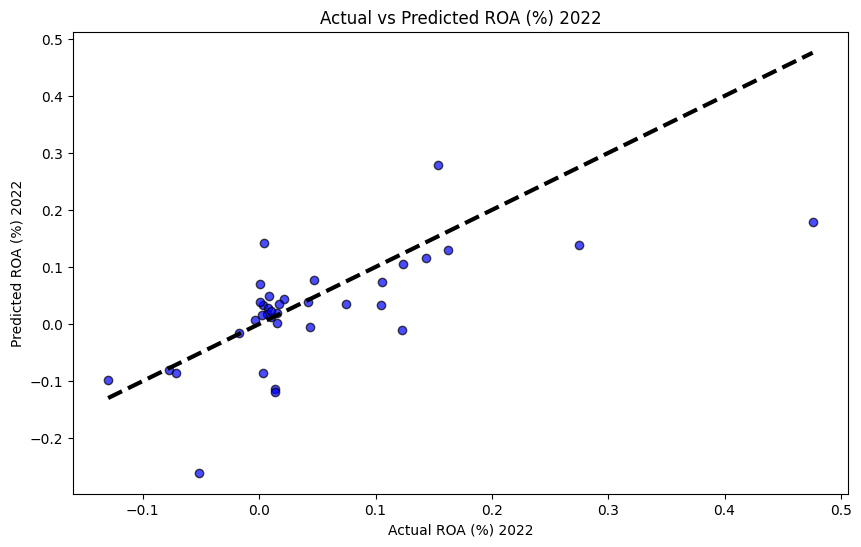

In [299]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ols, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual ROA (%) 2022')
plt.ylabel('Predicted ROA (%) 2022')
plt.title('Actual vs Predicted ROA (%) 2022')
plt.show()

Using 140 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/140 [00:00<?, ?it/s]

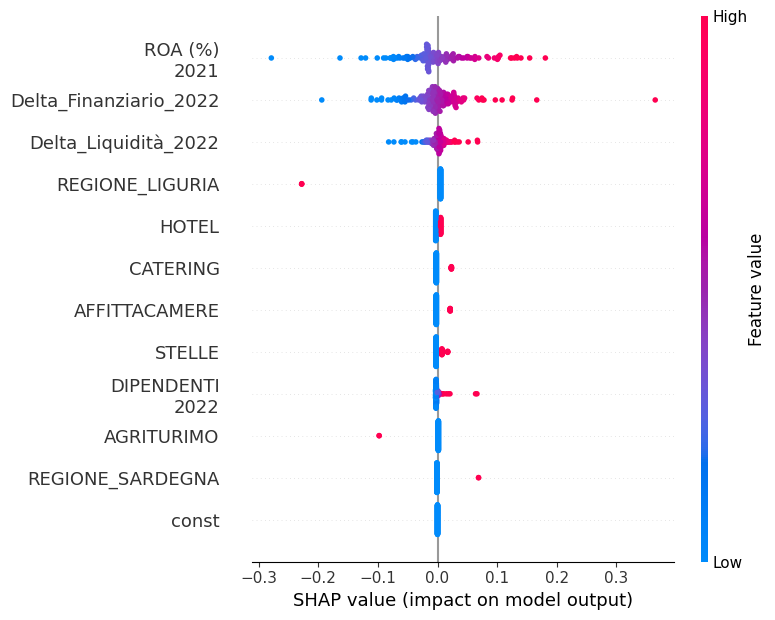

In [300]:
import shap
# Explanable AI with Shap
def predict(X):
    return ols_model.predict(sm.add_constant(X))

# Use SHAP's KernelExplainer
explainer = shap.KernelExplainer(predict, X_train_ols)
shap_values = explainer.shap_values(X_train_ols)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_train_ols)


# OLS with Polynomial Features

In [314]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import statsmodels.api as sm

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train[selected_features])
X_test_poly = poly.fit_transform(X_test[selected_features])

X_train_poly_df = pd.DataFrame(X_train_poly, columns=poly.get_feature_names_out(X_train[selected_features].columns))
X_test_poly_df = pd.DataFrame(X_test_poly, columns=poly.get_feature_names_out(X_test[selected_features].columns))

# constant
X_train_poly_df = sm.add_constant(X_train_poly_df)
X_test_poly_df = sm.add_constant(X_test_poly_df)

# Fit the poly OLS model using statsmodels
ols_poly_model = sm.OLS(y_train, X_train_poly_df).fit()

print(ols_poly_model.summary())

y_pred_poly = ols_poly_model.predict(X_test_poly_df)


                            OLS Regression Results                            
Dep. Variable:           ROA (%)
2022   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     6.620
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           7.68e-15
Time:                        20:21:10   Log-Likelihood:                 204.01
No. Observations:                 140   AIC:                            -316.0
Df Residuals:                      94   BIC:                            -180.7
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

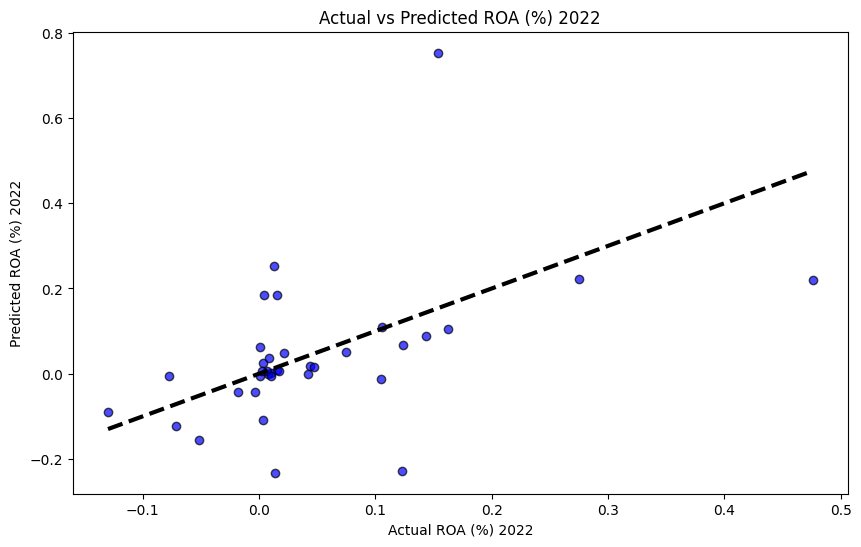

In [315]:
import matplotlib.pyplot as plt

# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual ROA (%) 2022')
plt.ylabel('Predicted ROA (%) 2022')
plt.title('Actual vs Predicted ROA (%) 2022')
plt.show()

Using 140 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/36 [00:00<?, ?it/s]

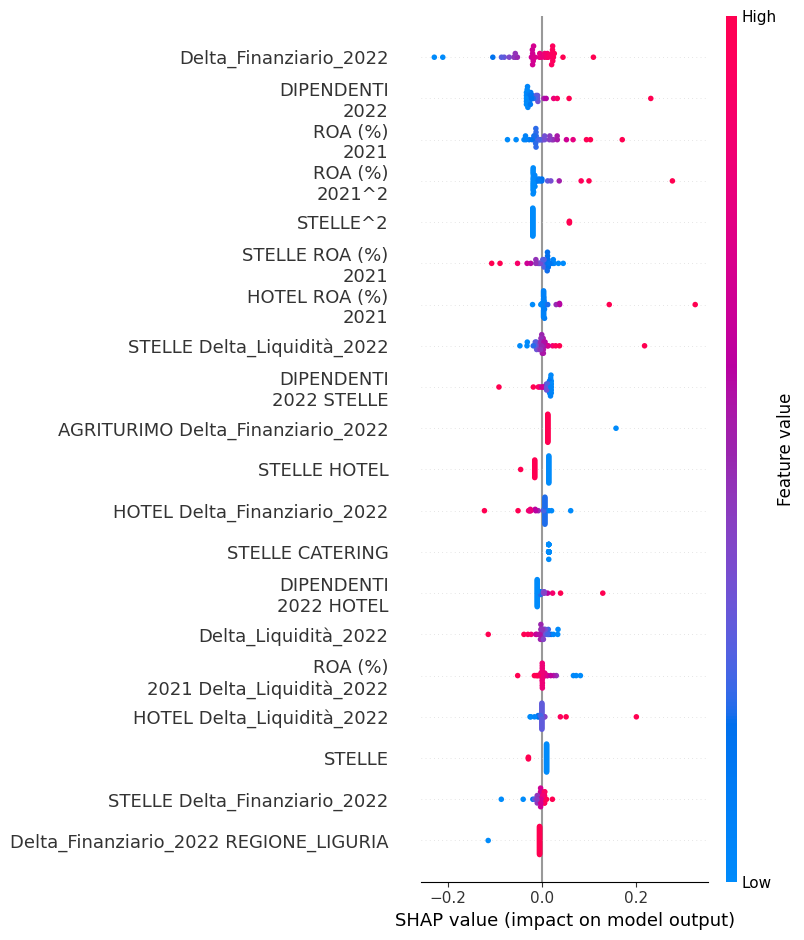

In [317]:
def predict_ols(X):
    return ols_poly_model.predict(sm.add_constant(X))

explainer = shap.KernelExplainer(predict_ols, X_train_poly_df)

shap_values = explainer.shap_values(X_test_poly_df)

shap.summary_plot(shap_values, X_test_poly_df)


In [350]:
import statsmodels.api as sm
import pandas as pd
from sklearn.preprocessing import SplineTransformer

# Apply the spline transformation
spline_transformer = SplineTransformer(degree=3, 
                                       n_knots=5, 
                                       include_bias=False)
X_train_transformed = spline_transformer.fit_transform(X_train)
X_test_transformed = spline_transformer.transform(X_test)

X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=spline_transformer.get_feature_names_out(X_train.columns))
X_train_transformed_df = sm.add_constant(X_train_transformed_df) 

X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=spline_transformer.get_feature_names_out(X_train.columns))
X_test_transformed_df = sm.add_constant(X_test_transformed_df)  
# There was a problem adding constant to test
if 'const' not in X_test_transformed_df.columns:
    X_test_transformed_df = sm.add_constant(X_test_transformed_df, has_constant='add')


spline_model = sm.OLS(y_train, X_train_transformed_df).fit()
y_pred_spline = spline_model.predict(X_test_transformed_df)

# Step 3: Get p-values and summary
print(spline_model.summary())

                            OLS Regression Results                            
Dep. Variable:           ROA (%)
2022   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     5.321
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           7.07e-11
Time:                        20:50:36   Log-Likelihood:                 244.35
No. Observations:                 140   AIC:                            -334.7
Df Residuals:                      63   BIC:                            -108.2
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

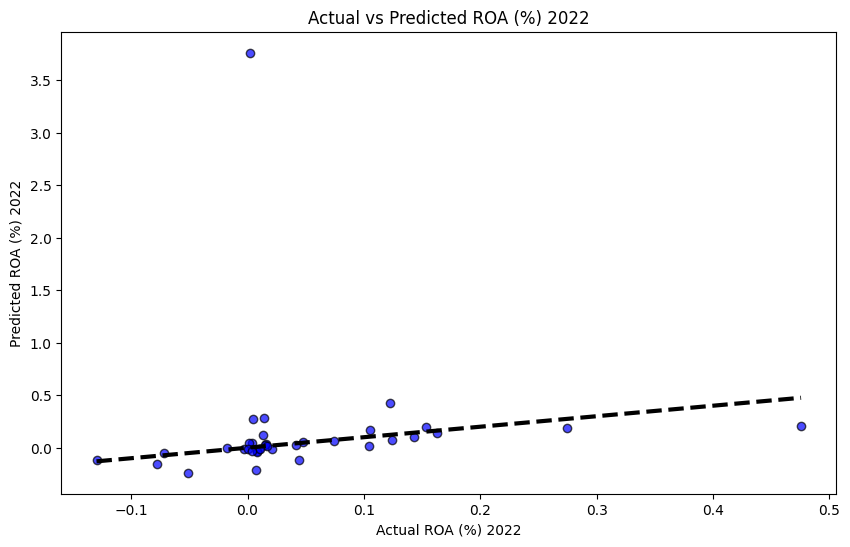

In [351]:
import matplotlib.pyplot as plt

# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_spline, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual ROA (%) 2022')
plt.ylabel('Predicted ROA (%) 2022')
plt.title('Actual vs Predicted ROA (%) 2022')
plt.show()

Using 140 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/36 [00:00<?, ?it/s]

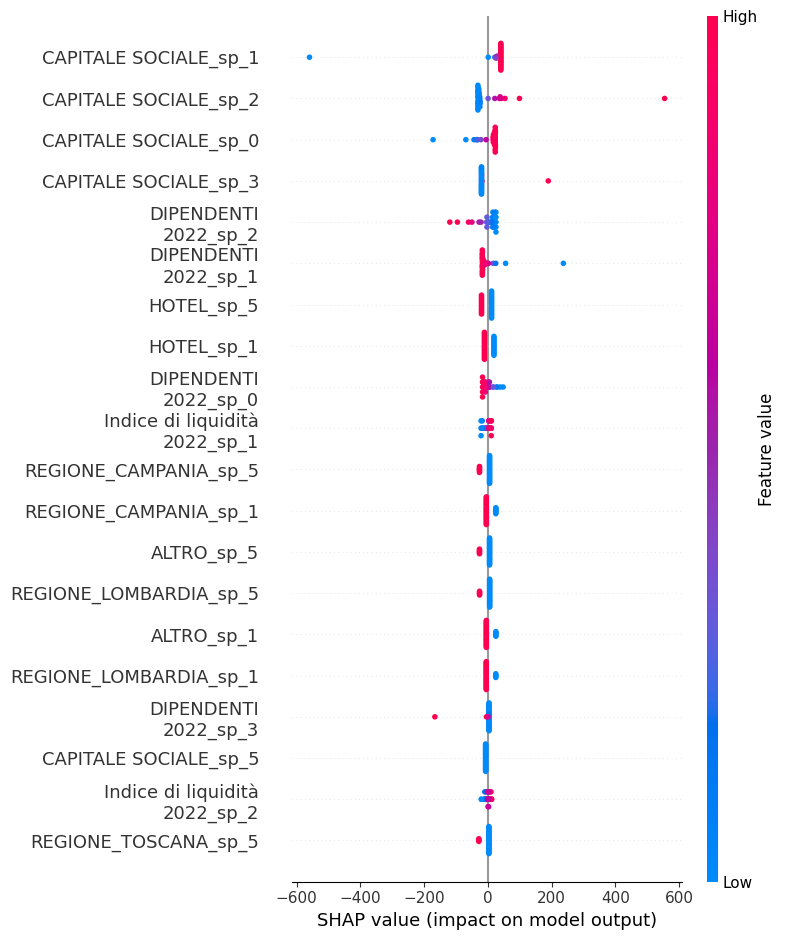

In [354]:
def predict_ols(X):
    return spline_model.predict(sm.add_constant(X))

explainer = shap.KernelExplainer(predict_ols, X_train_transformed_df)

shap_values = explainer.shap_values(X_test_transformed_df)

shap.summary_plot(shap_values, X_test_transformed_df)

# Simple Decision tree

Best parameters: {'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Mean Squared Error: 0.00779960884093318
R-squared: 0.2818003300680104


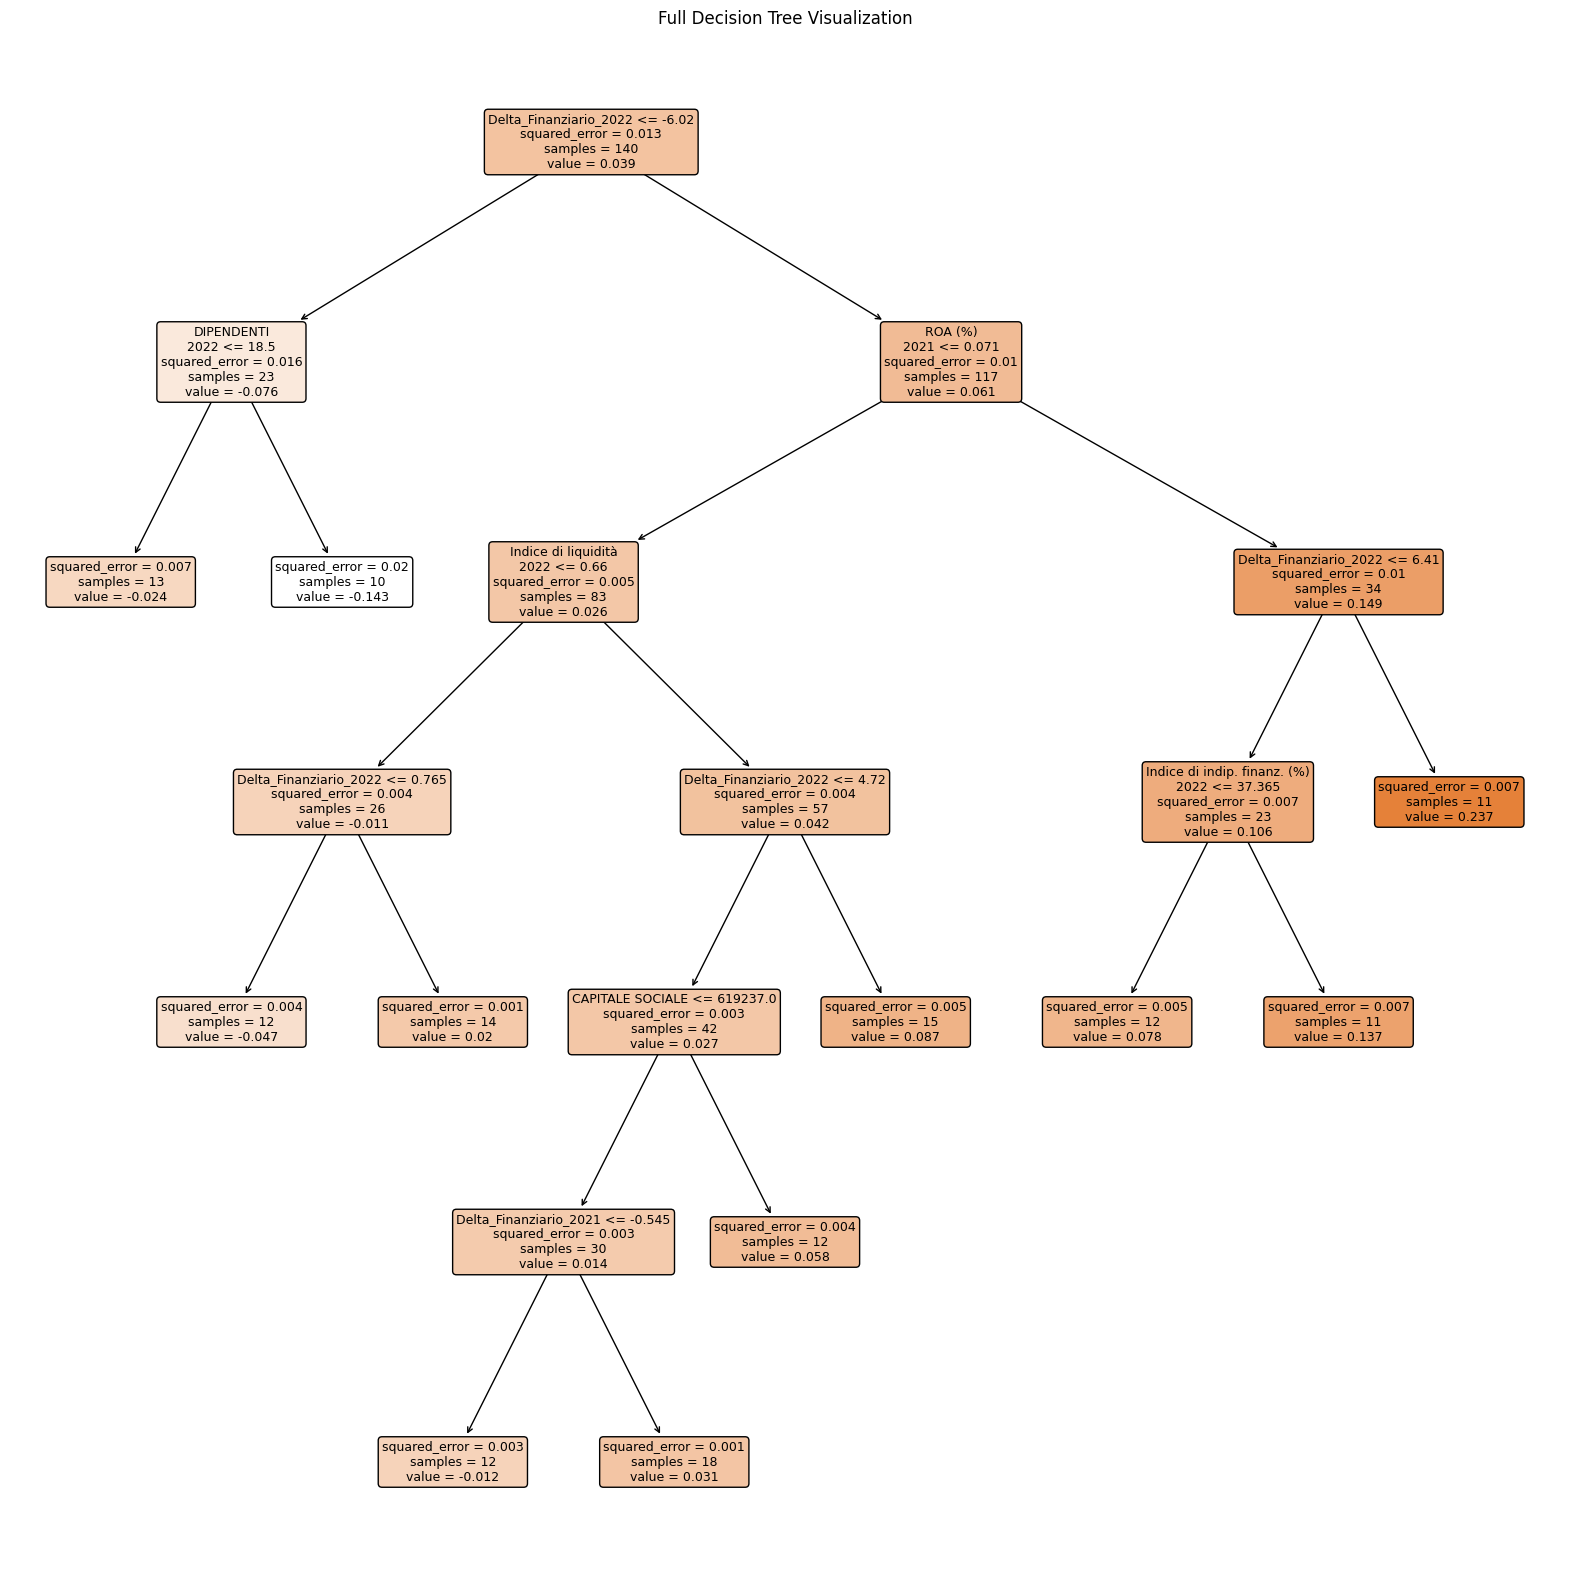

In [325]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Parameters grid to tune
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

# GridSearchCV 
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
dt_model = grid_search.best_estimator_

print("Best parameters:", grid_search.best_params_)

# predictions
y_pred_dt = dt_model.predict(X_test)

# evaluation metrics
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Mean Squared Error: {mse_dt}")
print(f"R-squared: {r2_dt}")

# Plot the full decision tree
plt.figure(figsize=(20, 20)) 
plot_tree(dt_model, filled=True, feature_names=X_train.columns, rounded=True)
plt.title("Full Decision Tree Visualization")
plt.show()
# The tree itself explain a lot, we do not need shap here

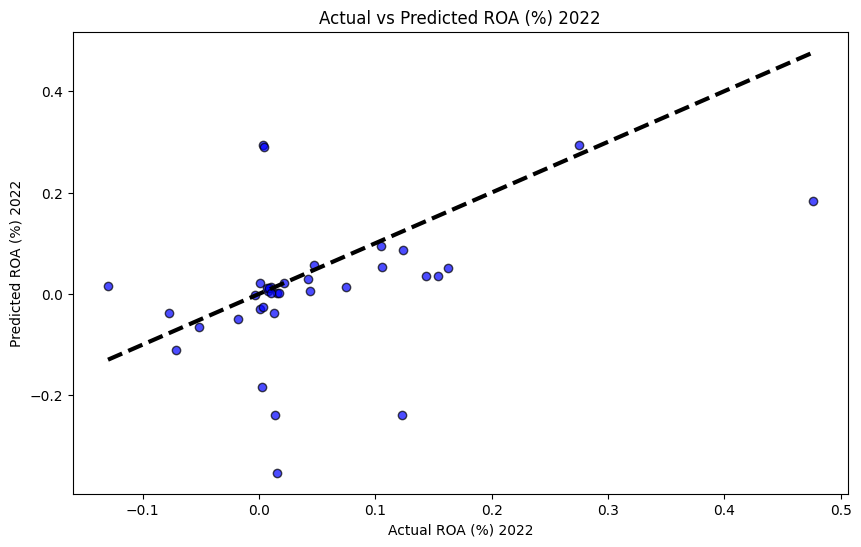

In [334]:
import matplotlib.pyplot as plt

# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual ROA (%) 2022')
plt.ylabel('Predicted ROA (%) 2022')
plt.title('Actual vs Predicted ROA (%) 2022')
plt.show()

# Simple Random Forest

In [327]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import shap

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")

Mean Squared Error: 0.00490239230463484
R-squared: 0.5485803702632077


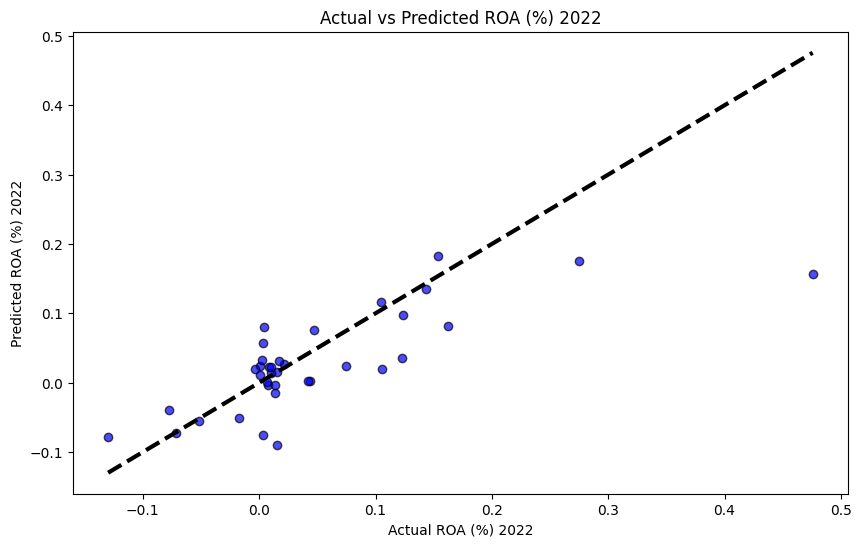

In [335]:
import matplotlib.pyplot as plt

# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual ROA (%) 2022')
plt.ylabel('Predicted ROA (%) 2022')
plt.title('Actual vs Predicted ROA (%) 2022')
plt.show()

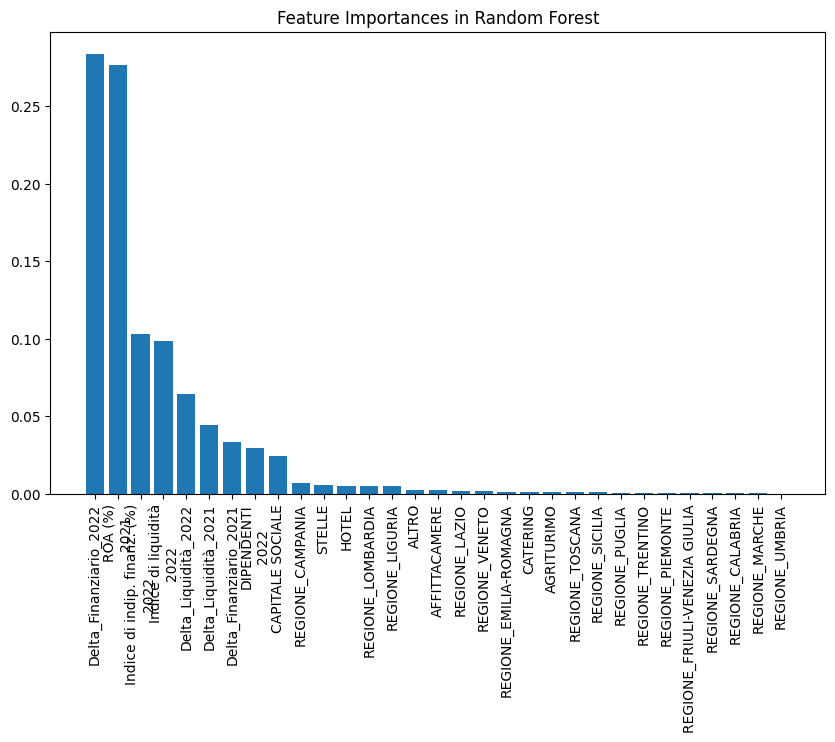

In [330]:
# feature importances
feature_importances = rf_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.title("Feature Importances in Random Forest")
plt.show()

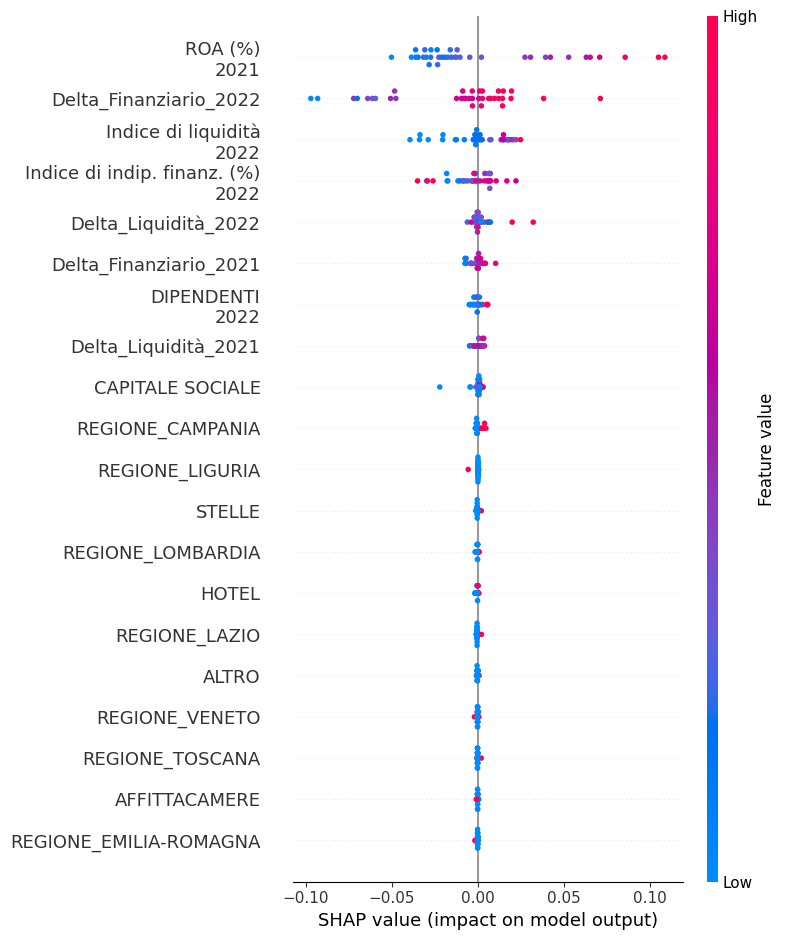

In [328]:
explainer = shap.TreeExplainer(rf_model)
shap_values_rf = explainer.shap_values(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values_rf, X_test)

In [331]:
from sklearn.ensemble import IsolationForest

# We try to remove outliers
iso_forest = IsolationForest(contamination=0.05, random_state=42)  
outliers = iso_forest.fit_predict(X_train)

# Remove outliers
X_train_no_outliers = X_train[outliers == 1]
y_train_no_outliers = y_train[outliers == 1]

rf_model.fit(X_train_no_outliers, y_train_no_outliers)
y_pred_no_outliers = rf_model.predict(X_test)
r2_no_outliers = r2_score(y_test, y_pred_no_outliers)
print(f"Random Forest R-squared without outliers: {r2_no_outliers}")


Random Forest R-squared without outliers: 0.6053580362710698


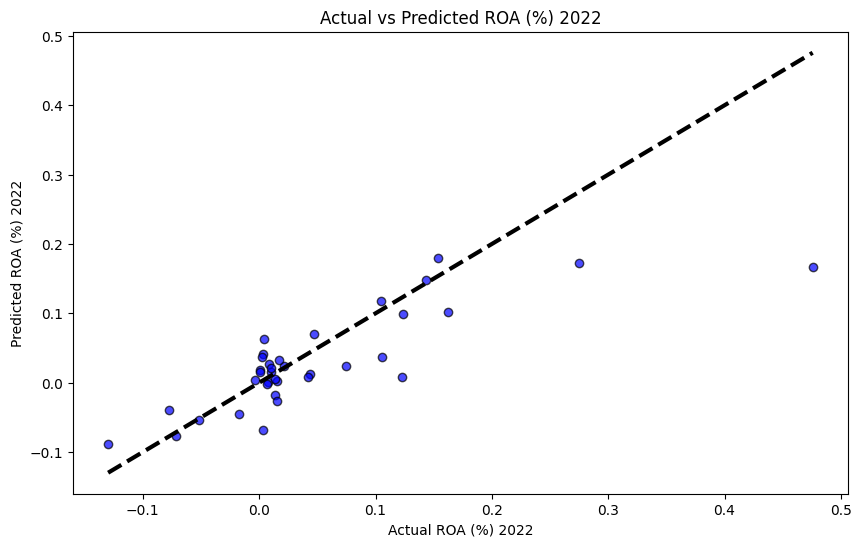

In [336]:
import matplotlib.pyplot as plt

# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_no_outliers, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual ROA (%) 2022')
plt.ylabel('Predicted ROA (%) 2022')
plt.title('Actual vs Predicted ROA (%) 2022')
plt.show()

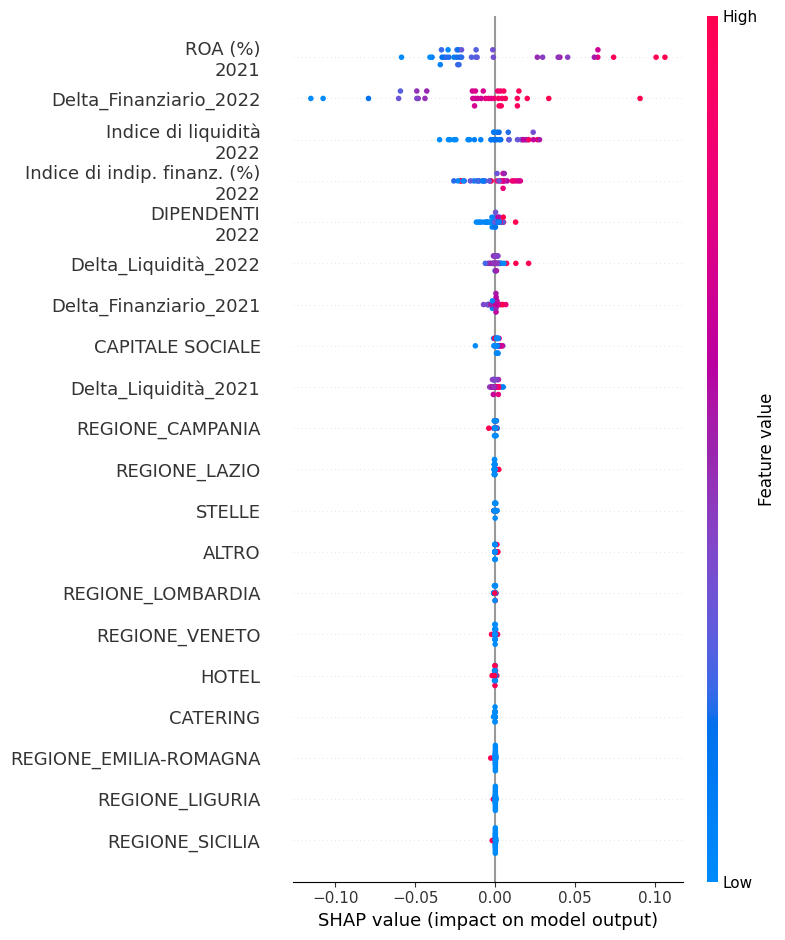

In [332]:
explainer = shap.TreeExplainer(rf_model)
shap_values_rf = explainer.shap_values(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values_rf, X_test)